In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Load the data
file_path = "../data/nhanes_1720.csv"
data = pd.read_csv(file_path)
data

,AUXU500R,AUXU1K1R,AUXU2KR,AUXU3KR,AUXU4KR,AUXU6KR,AUXU8KR,AUXU500L,AUXU1K1L,AUXU2KL,AUXU3KL,AUXU4KL,AUXU6KL,AUXU8KL
0,5.0,0.0,10.0,5.0,10.0,5.0,15.0,5.0,0.0,-5.0,5.0,0.0,5.0,15.0
1,15.0,10.0,10.0,5.0,0.0,15.0,-5.0,10.0,15.0,5.0,5.0,5.0,0.0,0.0
2,20.0,25.0,5.0,5.0,10.0,10.0,10.0,25.0,20.0,5.0,5.0,10.0,10.0,20.0
3,5.0,0.0,0.0,5.0,0.0,10.0,15.0,5.0,5.0,-5.0,5.0,-5.0,0.0,15.0
4,5.0,0.0,10.0,10.0,15.0,5.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,888.0,5.0,5.0,888.0,0.0,888.0,0.0,888.0,0.0,-5.0,888.0,5.0,888.0,10.0
5143,25.0,30.0,40.0,35.0,55.0,70.0,666.0,20.0,40.0,45.0,45.0,60.0,85.0,666.0
5144,30.0,20.0,5.0,25.0,15.0,30.0,45.0,35.0,30.0,15.0,30.0,25.0,55.0,60.0
5145,888.0,5.0,5.0,888.0,0.0,888.0,30.0,888.0,5.0,10.0,888.0,10.0,888.0,15.0


In [6]:
# Missing Data dropped for now
data.replace({666: None, 888: None, '.': None}, inplace=True)

# Drop rows where any column has missing data
cleaned_data = data.dropna()

print(f"The number of remaining rows is: {cleaned_data.shape[0]}")

The number of remaining rows is: 3837


In [7]:
# Separate left and right ears

right_ear = ['AUXU500R', 'AUXU1K1R', 'AUXU2KR', 'AUXU3KR', 'AUXU4KR', 'AUXU6KR', 'AUXU8KR']
left_ear = ['AUXU500L', 'AUXU1K1L', 'AUXU2KL', 'AUXU3KL', 'AUXU4KL', 'AUXU6KL', 'AUXU8KL']

right_ear_data = cleaned_data[right_ear]
left_ear_data = cleaned_data[left_ear]

In [8]:
# Standardize the data
scaler = StandardScaler()
right_ear_data_scaled = scaler.fit_transform(right_ear_data)
left_ear_data_scaled = scaler.fit_transform(left_ear_data)
both_ears_scaled = scaler.fit_transform(cleaned_data)

# 4 Cluters

/var/folders/7f/kq3rr2cx30nb0pq3qdp9x6740000gn/T/ipykernel_24859/4255359082.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["Cluster_4"] = gmm.predict(both_ears_scaled)


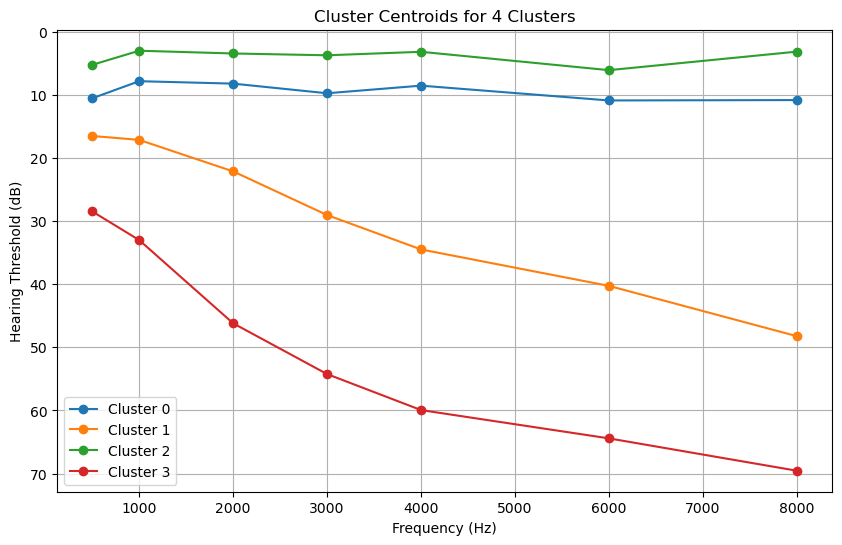

0.19535709342944813

In [33]:
num_clusters = 4

# Use Gaussian Mixture Model to cluster the data
from sklearn.mixture import GaussianMixture

# Fit the model
gmm = GaussianMixture(n_components=num_clusters)
gmm.fit(both_ears_scaled)

# Predict the cluster
cleaned_data["Cluster_4"] = gmm.predict(both_ears_scaled)
cleaned_data

# Plot the cluster centroids with 4 clusters
frequencies = [500, 1000, 2000, 3000, 4000, 6000, 8000]  # Correct frequency values

# Get the cluster centroids
centroids = scaler.inverse_transform(gmm.means_)
cluster_centroids = pd.DataFrame(centroids, columns=right_ear + left_ear)

# Plot the cluster centroids
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.plot(frequencies, cluster_centroids.iloc[i, :7], marker = "o",label=f"Cluster {i}")
    
plt.xlabel("Frequency (Hz)")
plt.ylabel("Hearing Threshold (dB)")
# flip the y-axis
plt.gca().invert_yaxis()
plt.title(f"Cluster Centroids for {num_clusters} Clusters")
plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

# Calculate the Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_score(both_ears_scaled, gmm.predict(both_ears_scaled))

# 5 Clusters

/var/folders/7f/kq3rr2cx30nb0pq3qdp9x6740000gn/T/ipykernel_24859/2486659789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["Cluster_5"] = gmm.predict(both_ears_scaled)


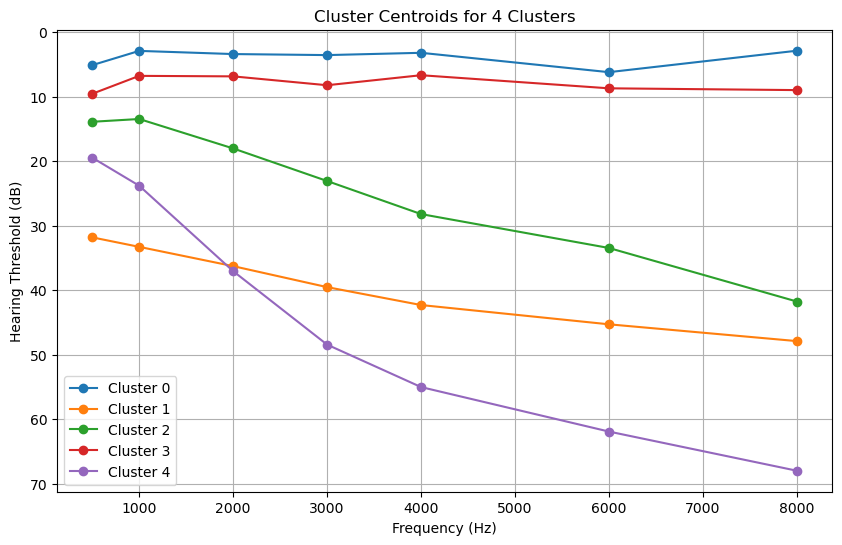

0.14460267213866035

In [28]:
num_clusters = 5

# Use Gaussian Mixture Model to cluster the data
from sklearn.mixture import GaussianMixture

# Fit the model
gmm = GaussianMixture(n_components=5)
gmm.fit(both_ears_scaled)

# Predict the cluster
cleaned_data["Cluster_5"] = gmm.predict(both_ears_scaled)
cleaned_data

# Plot the cluster centroids with 5 clusters
frequencies = [500, 1000, 2000, 3000, 4000, 6000, 8000]  # Correct frequency values

# Get the cluster centroids
centroids = scaler.inverse_transform(gmm.means_)
cluster_centroids = pd.DataFrame(centroids, columns=right_ear + left_ear)

# Plot the cluster centroids
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(frequencies, cluster_centroids.iloc[i, :7], marker = "o",label=f"Cluster {i}")
    
plt.xlabel("Frequency (Hz)")
plt.ylabel("Hearing Threshold (dB)")
# flip the y-axis
plt.gca().invert_yaxis()
plt.title(f"Cluster Centroids for {num_clusters} Clusters")
plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

# Calculate the Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_score(both_ears_scaled, gmm.predict(both_ears_scaled))

# 3 Clusters

/var/folders/7f/kq3rr2cx30nb0pq3qdp9x6740000gn/T/ipykernel_24859/1839428969.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[f"Cluster_{num_clusters}"] = gmm.predict(both_ears_scaled)


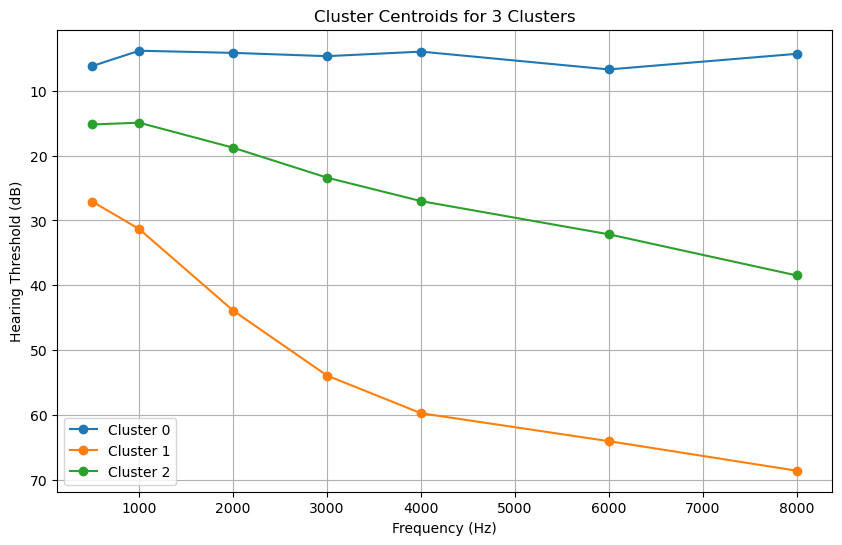

0.43194848893102067

In [30]:
num_clusters = 3
# Use Gaussian Mixture Model to cluster the data
from sklearn.mixture import GaussianMixture

# Fit the model
gmm = GaussianMixture(n_components=num_clusters)
gmm.fit(both_ears_scaled)

# Predict the cluster
cleaned_data[f"Cluster_{num_clusters}"] = gmm.predict(both_ears_scaled)
cleaned_data

# Plot the cluster centroids with 4 clusters
frequencies = [500, 1000, 2000, 3000, 4000, 6000, 8000]  # Correct frequency values

# Get the cluster centroids
centroids = scaler.inverse_transform(gmm.means_)
cluster_centroids = pd.DataFrame(centroids, columns=right_ear + left_ear)

# Plot the cluster centroids
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.plot(frequencies, cluster_centroids.iloc[i, :7], marker = "o",label=f"Cluster {i}")
    
plt.xlabel("Frequency (Hz)")
plt.ylabel("Hearing Threshold (dB)")
# flip the y-axis
plt.gca().invert_yaxis()
plt.title(f"Cluster Centroids for {num_clusters} Clusters")
plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

# Calculate the Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_score(both_ears_scaled, gmm.predict(both_ears_scaled))

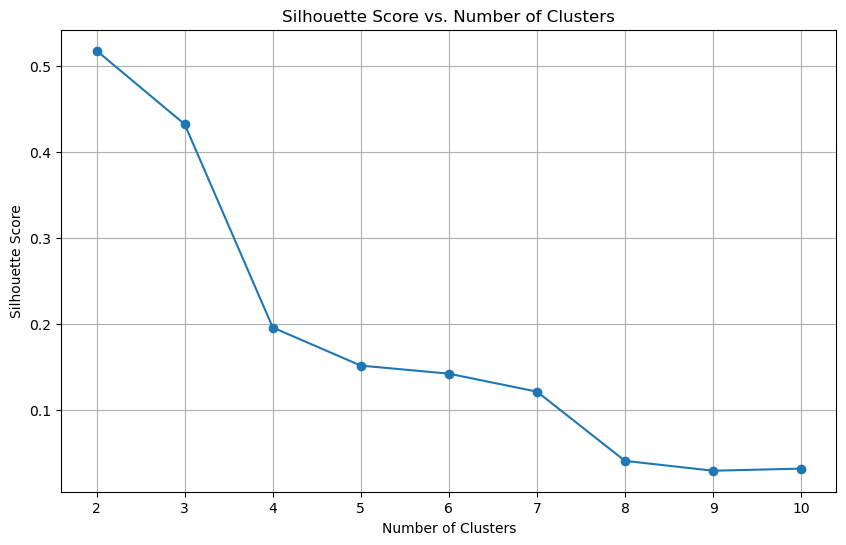

In [31]:
# Use Silhouette Score to determine the optimal number of clusters
silhouette_scores = []

for i in range(2, 11):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(both_ears_scaled)
    silhouette_scores.append(silhouette_score(both_ears_scaled, gmm.predict(both_ears_scaled)))

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.show()

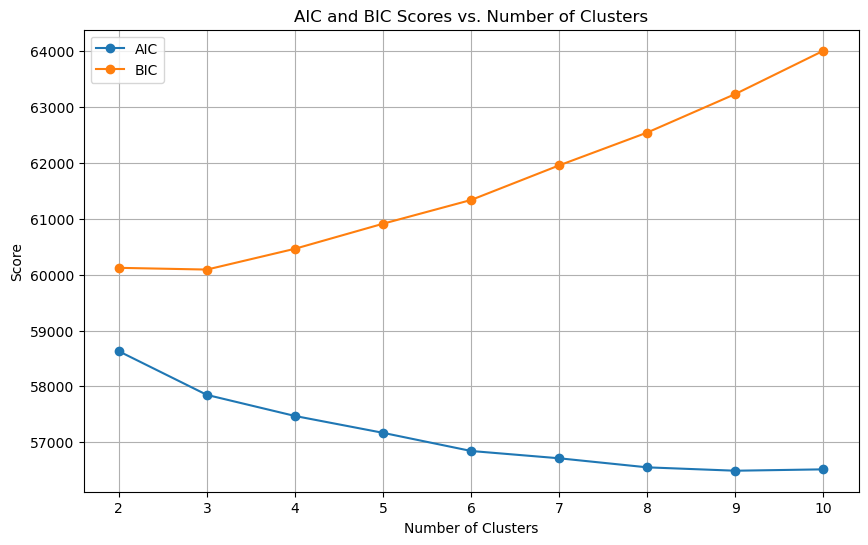

In [32]:
# Use AIC and BIC to determine the optimal number of clusters
aic_scores = []
bic_scores = []

for i in range(2, 11):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(both_ears_scaled)
    aic_scores.append(gmm.aic(both_ears_scaled))
    bic_scores.append(gmm.bic(both_ears_scaled))

# Plot the AIC and BIC Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), aic_scores, marker = "o", label = "AIC")
plt.plot(range(2, 11), bic_scores, marker = "o", label = "BIC")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("AIC and BIC Scores vs. Number of Clusters")
plt.legend()
plt.grid(True)
plt.show()